In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random

In [2]:
W_LIST_LEFT_HAND = [
        "l_w",
        "l_t_c",
        "l_t_m",
        "l_t_i",
        "l_t_t",
        "l_i_m",
        "l_i_p",
        "l_i_d",
        "l_i_t",
        "l_m_m",
        "l_m_p",
        "l_m_d",
        "l_m_t",
        "l_r_m",
        "l_r_p",
        "l_r_d",
        "l_r_t",
        "l_p_m",
        "l_p_p",
        "l_p_d",
        "l_p_t",
    ]

W_LIST_RIGHT_HAND = [
        "r_w",
        "r_t_c",
        "r_t_m",
        "r_t_i",
        "r_t_t",
        "r_i_m",
        "r_i_p",
        "r_i_d",
        "r_i_t",
        "r_m_m",
        "r_m_p",
        "r_m_d",
        "r_m_t",
        "r_r_m",
        "r_r_p",
        "r_r_d",
        "r_r_t",
        "r_p_m",
        "r_p_p",
        "r_p_d",
        "r_p_t",
    ]

W_LIST_POSE = [
        "n", 
        "lei", 
        "le", 
        "leo", 
        "rei",
        "re",
        "reo",
        "lea",
        "rea",
        "ml",
        "mr",
        "ls",
        "rs",
        "lel",
        "rel",
        "lw",
        "rw",
        "lp",
        "rp",
        "li",
        "ri",
        "lt",
        "rt",
        "lh",
        "rh",
        "lk",
        "rk",
        "la",
        "ra",
        "lhe",
        "rhe",
        "lf",
        "rf"
    ]

In [3]:
os.getcwd()

'C:\\Users\\JAQQ\\YOLO\\hac\\analysis'

In [4]:
np.random.seed(5566)
random.seed(5566)

In [5]:
data_path = "..\\data\\actions"

In [6]:
model_target = "actions"

if model_target == "actions":
    model_name = "roblox_lift_game"
    actions = ["walk", "jump", "hands_on_hips", "point_left", "point_right", "arms_lift", "punch", "trample", "lateral_raise", "stand"]
    target_columns = [key + "_x" for key in W_LIST_RIGHT_HAND] + [key + "_y" for key in W_LIST_RIGHT_HAND]
    target_columns += [key + "_x" for key in W_LIST_LEFT_HAND] + [key + "_y" for key in W_LIST_LEFT_HAND]
    target_columns += [key + "_x" for key in W_LIST_POSE] + [key + "_y" for key in W_LIST_POSE]
    target_columns_x = target_columns.copy()
    target_columns += ["image_name", "label"]
elif model_target == "gestures":
    model_name = "mouse"
    actions = ["r_five", "r_zero", "l_five", "l_zero", "two_index_fingers_up", "two_index_fingers_down", "33", "55", "sit", "gesture_none"]
    target_columns = [key + "_x" for key in W_LIST_RIGHT_HAND] + [key + "_y" for key in W_LIST_RIGHT_HAND]
    target_columns += [key + "_x" for key in W_LIST_LEFT_HAND] + [key + "_y" for key in W_LIST_LEFT_HAND]
    target_columns_x = target_columns.copy()
    target_columns += ["image_name", "label"]
else:
    RunTimeError("???")

dfs = []
for idx, action in enumerate(actions):
    file_path = os.path.join(data_path, action, "data.csv")
    print(file_path)
    df = pd.read_csv(file_path)

    df.label = idx
    dfs.append(df)

..\data\actions\walk\data.csv
..\data\actions\jump\data.csv
..\data\actions\hands_on_hips\data.csv
..\data\actions\point_left\data.csv
..\data\actions\point_right\data.csv
..\data\actions\arms_lift\data.csv
..\data\actions\punch\data.csv
..\data\actions\trample\data.csv
..\data\actions\lateral_raise\data.csv
..\data\actions\stand\data.csv


In [7]:
df_train = pd.concat(dfs)
df_train.reset_index(drop=True)
df_train = df_train.fillna(0)
df_train

,n_x,n_y,n_v,lei_x,lei_y,lei_v,le_x,le_y,le_v,leo_x,...,r_p_p_y,r_p_p_v,r_p_d_x,r_p_d_y,r_p_d_v,r_p_t_x,r_p_t_y,r_p_t_v,image_name,label
0,0.509826,0.790976,0.996212,0.524391,0.809645,0.993615,0.531443,0.805283,0.990742,0.538297,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1626033708734.png,0
1,0.505817,0.766078,0.996582,0.519767,0.785251,0.994219,0.526347,0.781523,0.991658,0.532932,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1626033709103.png,0
2,0.502098,0.750100,0.996911,0.515123,0.774690,0.994708,0.521026,0.772047,0.992472,0.526957,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1626033709464.png,0
3,0.497813,0.761369,0.997201,0.508259,0.778950,0.995040,0.513120,0.775779,0.993202,0.517845,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1626033709824.png,0
4,0.497416,0.731844,0.997474,0.509726,0.763261,0.995494,0.515646,0.761028,0.993869,0.521775,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1626033710154.png,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,0.505055,0.853353,0.999973,0.514502,0.872395,0.999941,0.522862,0.870936,0.999922,0.529466,...,0.021926,0.0,0.367267,0.018427,0.0,0.371595,0.021468,0.0,1626157099102.png,9
456,0.503939,0.853331,0.999974,0.513634,0.872416,0.999943,0.522038,0.870975,0.999925,0.528832,...,0.032285,0.0,0.364024,0.029971,0.0,0.369304,0.033603,0.0,1626157099178.png,9
457,0.503540,0.853251,0.999975,0.513130,0.872420,0.999944,0.521526,0.870994,0.999928,0.528443,...,0.030910,0.0,0.367047,0.029005,0.0,0.371733,0.032888,0.0,1626157099270.png,9
458,0.503719,0.853193,0.999976,0.513268,0.872423,0.999946,0.521672,0.870996,0.999930,0.528518,...,0.034011,0.0,0.360115,0.028510,0.0,0.364668,0.030136,0.0,1626157099364.png,9


In [8]:
#df_train = df_train[target_columns].dropna()

In [9]:
df_train_x = df_train[target_columns_x]
df_train_y = df_train["label"]
df_train_image = df_train["image_name"]

In [10]:
df_train_x.max(axis=1)

0      0.815956
1      0.790320
2      0.781018
3      0.781722
4      0.766764
         ...   
455    0.873218
456    0.873139
457    0.872967
458    0.872893
459    0.872587
Length: 4882, dtype: float64

In [11]:
df_train_x.min(axis=1)

0     -1.200804
1     -1.149853
2     -1.101324
3     -1.065258
4     -1.107925
         ...   
455   -0.589958
456   -0.593216
457   -0.595079
458   -0.595188
459   -0.594819
Length: 4882, dtype: float64

In [12]:
df_train_x.columns

Index(['r_w_x', 'r_t_c_x', 'r_t_m_x', 'r_t_i_x', 'r_t_t_x', 'r_i_m_x',
       'r_i_p_x', 'r_i_d_x', 'r_i_t_x', 'r_m_m_x',
       ...
       'lh_y', 'rh_y', 'lk_y', 'rk_y', 'la_y', 'ra_y', 'lhe_y', 'rhe_y',
       'lf_y', 'rf_y'],
      dtype='object', length=150)

In [13]:
df_train_x = df_train_x.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)
df_train_x = df_train_x.fillna(0)
df_train_x
#df_train_x = (df_train_x - df_train_x.min(axis=1)) / (df_train_x.max(axis=1) - df_train_x.min(axis=1))
#df_train_x

,r_w_x,r_t_c_x,r_t_m_x,r_t_i_x,r_t_t_x,r_i_m_x,r_i_p_x,r_i_d_x,r_i_t_x,r_m_m_x,...,lh_y,rh_y,lk_y,rk_y,la_y,ra_y,lhe_y,rhe_y,lf_y,rf_y
0,0.595412,0.595412,0.595412,0.595412,0.595412,0.595412,0.595412,0.595412,0.595412,0.595412,...,0.658592,0.667143,0.360761,0.370871,0.087928,0.082108,0.060535,0.052809,0.002906,0.0
1,0.592655,0.592655,0.592655,0.592655,0.592655,0.592655,0.592655,0.592655,0.592655,0.592655,...,0.667279,0.673639,0.366882,0.383681,0.089422,0.088503,0.062029,0.059714,0.001866,0.0
2,0.585082,0.585082,0.585082,0.585082,0.585082,0.585082,0.585082,0.585082,0.585082,0.585082,...,0.668898,0.678636,0.367458,0.383377,0.084009,0.089606,0.055074,0.064069,0.003224,0.0
3,0.576757,0.576757,0.576757,0.576757,0.576757,0.576757,0.576757,0.576757,0.576757,0.576757,...,0.674869,0.689033,0.372257,0.387446,0.091307,0.090139,0.063361,0.062977,0.006152,0.0
4,0.590991,0.590991,0.590991,0.590991,0.590991,0.590991,0.590991,0.590991,0.590991,0.590991,...,0.686881,0.691830,0.371291,0.382393,0.093128,0.089290,0.063426,0.062165,0.005307,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,0.656475,0.671468,0.676497,0.676018,0.675822,0.660634,0.664868,0.668715,0.669655,0.651867,...,0.532809,0.533620,0.299869,0.298716,0.091260,0.075096,0.064948,0.046867,0.011682,0.0
456,0.657447,0.671899,0.676338,0.676160,0.676544,0.661547,0.664741,0.668538,0.670359,0.652936,...,0.532567,0.534218,0.299776,0.299038,0.091371,0.075117,0.065005,0.046670,0.011955,0.0
457,0.658464,0.672846,0.676083,0.675268,0.676123,0.659222,0.664037,0.669148,0.670788,0.651276,...,0.532792,0.534115,0.299985,0.299175,0.091148,0.074793,0.064656,0.046233,0.012137,0.0
458,0.657867,0.672135,0.676439,0.675908,0.676142,0.661258,0.664971,0.669054,0.670676,0.652158,...,0.532528,0.533770,0.299933,0.299151,0.090554,0.074489,0.063851,0.045758,0.011950,0.0


In [14]:
for c in df_train_x.columns:
    print(c)

r_w_x
r_t_c_x
r_t_m_x
r_t_i_x
r_t_t_x
r_i_m_x
r_i_p_x
r_i_d_x
r_i_t_x
r_m_m_x
r_m_p_x
r_m_d_x
r_m_t_x
r_r_m_x
r_r_p_x
r_r_d_x
r_r_t_x
r_p_m_x
r_p_p_x
r_p_d_x
r_p_t_x
r_w_y
r_t_c_y
r_t_m_y
r_t_i_y
r_t_t_y
r_i_m_y
r_i_p_y
r_i_d_y
r_i_t_y
r_m_m_y
r_m_p_y
r_m_d_y
r_m_t_y
r_r_m_y
r_r_p_y
r_r_d_y
r_r_t_y
r_p_m_y
r_p_p_y
r_p_d_y
r_p_t_y
l_w_x
l_t_c_x
l_t_m_x
l_t_i_x
l_t_t_x
l_i_m_x
l_i_p_x
l_i_d_x
l_i_t_x
l_m_m_x
l_m_p_x
l_m_d_x
l_m_t_x
l_r_m_x
l_r_p_x
l_r_d_x
l_r_t_x
l_p_m_x
l_p_p_x
l_p_d_x
l_p_t_x
l_w_y
l_t_c_y
l_t_m_y
l_t_i_y
l_t_t_y
l_i_m_y
l_i_p_y
l_i_d_y
l_i_t_y
l_m_m_y
l_m_p_y
l_m_d_y
l_m_t_y
l_r_m_y
l_r_p_y
l_r_d_y
l_r_t_y
l_p_m_y
l_p_p_y
l_p_d_y
l_p_t_y
n_x
lei_x
le_x
leo_x
rei_x
re_x
reo_x
lea_x
rea_x
ml_x
mr_x
ls_x
rs_x
lel_x
rel_x
lw_x
rw_x
lp_x
rp_x
li_x
ri_x
lt_x
rt_x
lh_x
rh_x
lk_x
rk_x
la_x
ra_x
lhe_x
rhe_x
lf_x
rf_x
n_y
lei_y
le_y
leo_y
rei_y
re_y
reo_y
lea_y
rea_y
ml_y
mr_y
ls_y
rs_y
lel_y
rel_y
lw_y
rw_y
lp_y
rp_y
li_y
ri_y
lt_y
rt_y
lh_y
rh_y
lk_y
rk_y
la_y
ra_y
lhe_y
rhe_

In [15]:
df_train_image

0      1626033708734.png
1      1626033709103.png
2      1626033709464.png
3      1626033709824.png
4      1626033710154.png
             ...        
455    1626157099102.png
456    1626157099178.png
457    1626157099270.png
458    1626157099364.png
459    1626157099443.png
Name: image_name, Length: 4882, dtype: object

In [16]:
X_train = df_train_x.values
Y_train = df_train_y.values
print(X_train.shape)
print(Y_train.shape)

(4882, 150)
(4882,)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [18]:
models = [
          #('LogReg', LogisticRegression(max_iter=10000)),
          #('RF', RandomForestClassifier()),
          #('KNN', KNeighborsClassifier()),
          #('SVM', SVC()), 
          #('GNB', GaussianNB()),
          ('XGB', XGBClassifier(max_depth=6, use_label_encoder=False, eval_metric='mlogloss'))
        ]
results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

dfs_final = []

kfold = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=5566)

for name, model in models:
    cv_results = model_selection.cross_validate(model, X_train, Y_train, cv=kfold, scoring=scoring)
    #clf = model.fit(X_train, Y_train)
    #y_pred = clf.predict(X_test)

    print(name)
    #print(classification_report(Y_test, y_pred, target_names=target_names))
    
    results.append(cv_results)
    names.append(name)
    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs_final.append(this_df)

final = pd.concat(dfs_final, ignore_index=True)

XGB


In [19]:
bootstraps = []
for model in sorted(list(set(final.model.values))):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

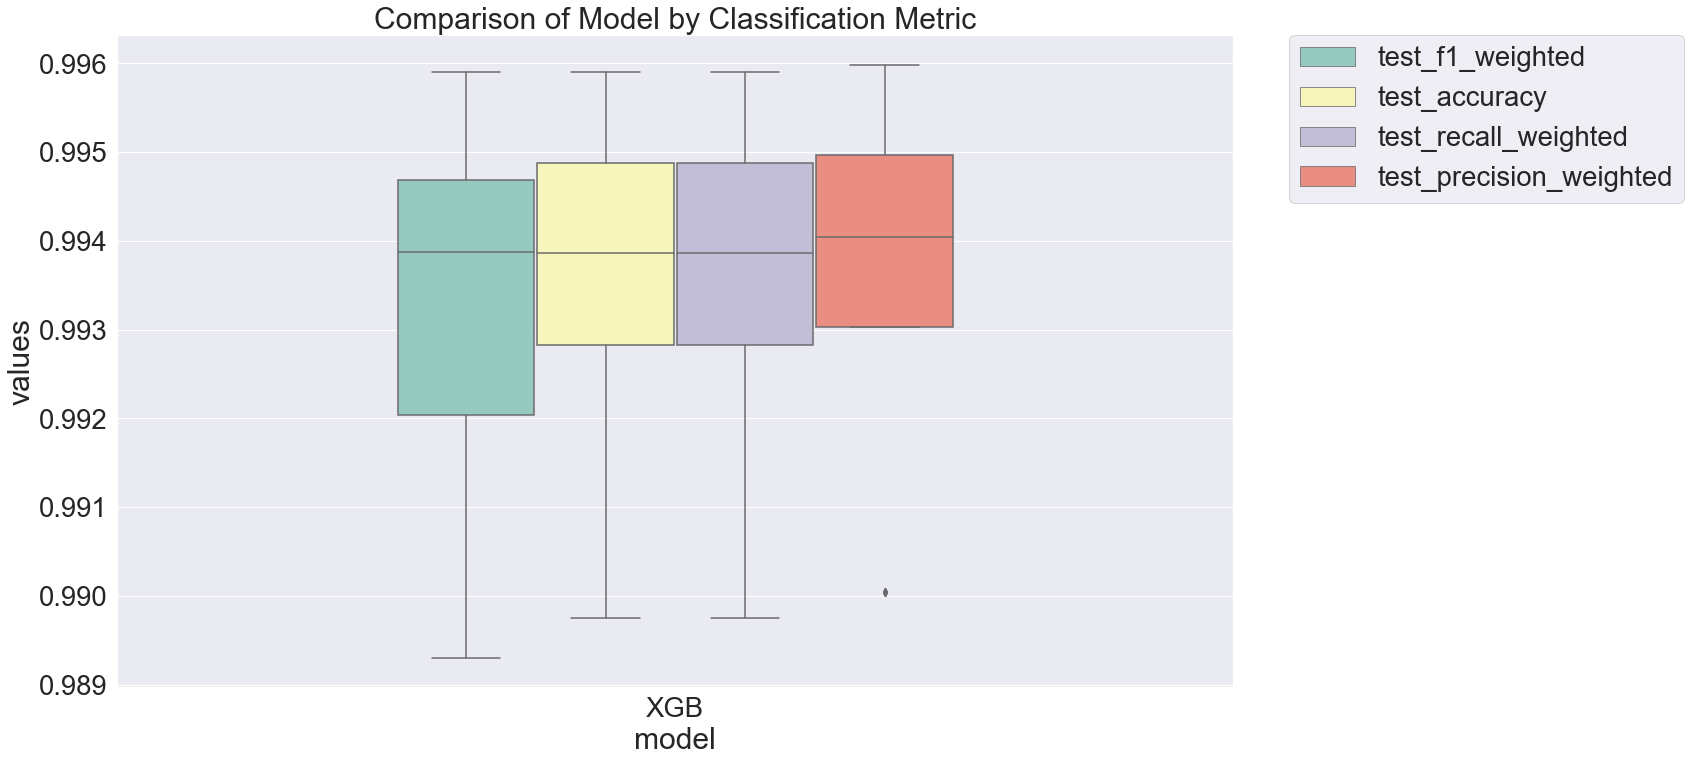

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.show()

In [21]:
models = [('XGB', XGBClassifier(max_depth=6, use_label_encoder=False, eval_metric='mlogloss'))]
results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

dfs_final = []

kfold = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=90210)

for name, model in models:
    
    clf = model.fit(X_train, Y_train)
    print(clf)
    

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)


In [22]:
import pickle
import pathlib

In [23]:
model_path = "C:\\Users\\JAQQ\\YOLO\\hac\\hac\\model\\" + model_name + "\\model.pth"
pathlib.Path(os.path.dirname(model_path)).mkdir(parents=True, exist_ok=True)
pickle.dump(clf, open(model_path, 'wb'))
loaded_model = pickle.load(open(model_path, 'rb'))

In [24]:
loaded_model.predict(X_train) == Y_train

array([ True,  True,  True, ...,  True,  True,  True])

In [25]:
Y_train < 6

array([ True,  True,  True, ..., False, False, False])

In [26]:
loaded_model.predict_proba(X_train[Y_train < 6]).max(axis=1)

array([0.9986551 , 0.9982339 , 0.998762  , ..., 0.98819613, 0.99703515,
       0.9923199 ], dtype=float32)